# Exercise 47

# Imbalanced Data

In [231]:
from imblearn.datasets import fetch_datasets
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm

In [232]:
mammography=fetch_datasets()['mammography']

In [233]:
pd.DataFrame(mammography['target'])[0].value_counts()

-1    10923
 1      260
Name: 0, dtype: int64

In [234]:
X_train, X_test, y_train, y_test = train_test_split(mammography['data'],mammography['target'],test_size=0.20, random_state=123, stratify=mammography['target'])

In [235]:
pd.DataFrame(y_train)[0].value_counts()

-1    8738
 1     208
Name: 0, dtype: int64

In [236]:
pd.DataFrame(y_test)[0].value_counts()

-1    2185
 1      52
Name: 0, dtype: int64

In [237]:
clf_random = RandomForestClassifier(n_estimators=20, max_depth=None,
     min_samples_split=7, random_state=0)

In [238]:
clf_random.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=7,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [239]:
y_pred=clf_random.predict(X_test)


In [240]:
target_names = ['Benign', 'Malignant']
print(classification_report(y_test, y_pred,target_names=target_names))
              

              precision    recall  f1-score   support

      Benign       0.99      1.00      0.99      2185
   Malignant       0.81      0.48      0.60        52

   micro avg       0.99      0.99      0.99      2237
   macro avg       0.90      0.74      0.80      2237
weighted avg       0.98      0.99      0.98      2237



In [241]:
cm = confusion_matrix(y_test, y_pred) 

cm_df = pd.DataFrame(cm,
                     index = ['Benign', 'Malignant'], 
                     columns = ['Benign', 'Malignant'])


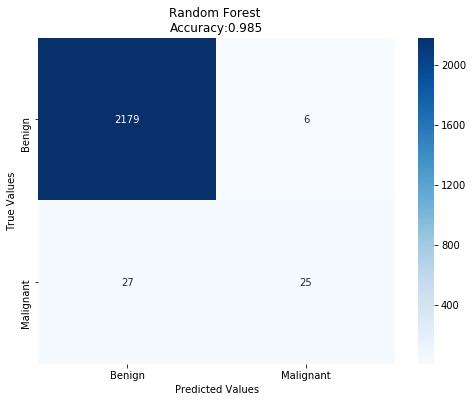

In [242]:
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,fmt='g',cmap='Blues')
plt.title('Random Forest \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()

In [243]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from collections import Counter
import numpy as np

In [244]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# Exercise 48

# Visualizing  Sampling Techniques

## Original Data

In [245]:
X=mammography['data'][:,[0,1]]
y=mammography['target']


In [246]:
print(sorted(Counter(y).items()))

[(-1, 10923), (1, 260)]


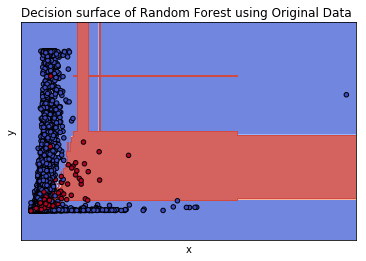

In [247]:
clf = clf_random.fit(X,y)

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of Random Forest using Original Data ')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('y')
ax.set_xlabel('x')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

## Under Sample

In [248]:
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(mammography['data'],mammography['target'])

In [249]:
print(sorted(Counter(y_resampled).items()))

[(-1, 260), (1, 260)]


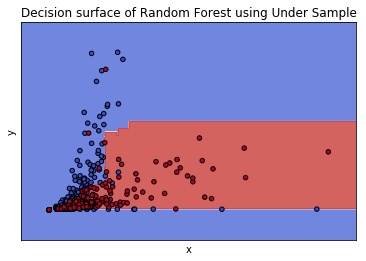

In [250]:
X=X_resampled[:,[0,1]]
y=y_resampled

clf = clf_random.fit(X,y)

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of Random Forest using Under Sample')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('y')
ax.set_xlabel('x')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

## Over Sample

In [251]:
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(mammography['data'],mammography['target'])

In [252]:
print(sorted(Counter(y_resampled).items()))

[(-1, 10923), (1, 10923)]


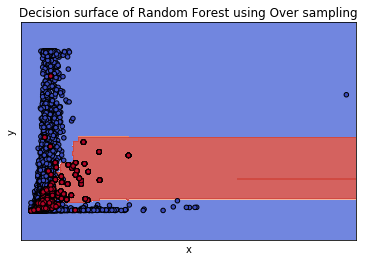

In [253]:
X=X_resampled[:,[0,1]]
y=y_resampled

clf = clf_random.fit(X,y)

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of Random Forest using Over sampling')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('y')
ax.set_xlabel('x')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
#ax.legend()
plt.show()

## SMOTE

In [254]:
X_resampled, y_resampled = SMOTE().fit_resample(mammography['data'],mammography['target'])

In [255]:
print(sorted(Counter(y_resampled).items()))

[(-1, 10923), (1, 10923)]


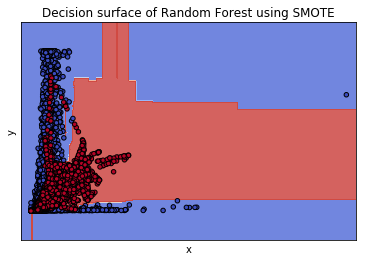

In [256]:
X=X_resampled[:,[0,1]]
y=y_resampled

clf = clf_random.fit(X,y)

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of Random Forest using SMOTE')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('y')
ax.set_xlabel('x')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
#ax.legend()
plt.show()


# Exercise 49

## Fitting a Random Forest Classifier using SMOTE and Building the Confusion Matrix

In [257]:
X_resampled, y_resampled = SMOTE().fit_resample(X_train,y_train)

In [258]:
clf_random.fit(X_resampled,y_resampled)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=7,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [259]:
y_pred=clf_random.predict(X_test)

In [260]:
target_names = ['Benign', 'Malignant']
print(classification_report(y_test, y_pred,target_names=target_names))

              precision    recall  f1-score   support

      Benign       0.99      0.98      0.99      2185
   Malignant       0.51      0.73      0.60        52

   micro avg       0.98      0.98      0.98      2237
   macro avg       0.75      0.86      0.79      2237
weighted avg       0.98      0.98      0.98      2237



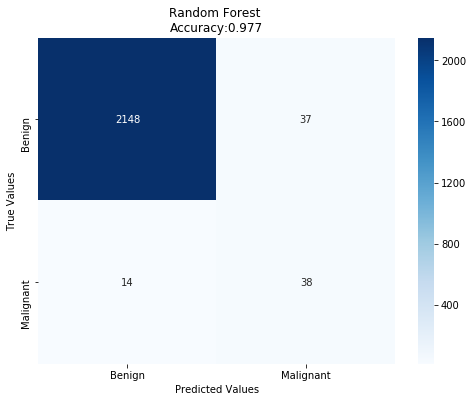

In [261]:
cm = confusion_matrix(y_test, y_pred) 

cm_df = pd.DataFrame(cm,
                     index = ['Benign', 'Malignant'], 
                     columns = ['Benign', 'Malignant'])
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,fmt='g',cmap='Blues')
plt.title('Random Forest \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()